<a href="https://colab.research.google.com/github/fahizakaruppanthodi/Car-Price-Prediction-Using-Regression/blob/main/Car_Price_Prediction_Using_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error


In [ ]:
df=pd.read_csv("/content/carpriceRegression_Dataset.csv")
df

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
1,2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
2,4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
3,7,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
4,8,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5399,9561,Hyundai,2015,1300000,40000,Diesel,Individual,Manual,First Owner,5,126.20,kmpl,19.67,1582
5400,9562,Maruti,2017,700000,15000,Petrol,Individual,Automatic,First Owner,5,81.80,kmpl,21.21,1197
5401,9563,Ford,2015,600000,135000,Diesel,Individual,Manual,First Owner,5,98.59,kmpl,22.77,1498
5402,9564,Maruti,2012,229999,120000,Diesel,Individual,Manual,First Owner,5,73.94,kmpl,23.20,1248


In [ ]:
df.head() #(first 5 elements)

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
1,2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
2,4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
3,7,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
4,8,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399


In [ ]:
df.tail() #(last 5 elements)

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
5399,9561,Hyundai,2015,1300000,40000,Diesel,Individual,Manual,First Owner,5,126.20,kmpl,19.67,1582
5400,9562,Maruti,2017,700000,15000,Petrol,Individual,Automatic,First Owner,5,81.80,kmpl,21.21,1197
5401,9563,Ford,2015,600000,135000,Diesel,Individual,Manual,First Owner,5,98.59,kmpl,22.77,1498
5402,9564,Maruti,2012,229999,120000,Diesel,Individual,Manual,First Owner,5,73.94,kmpl,23.20,1248
5403,9565,Tata,2007,100000,90000,Diesel,Individual,Manual,Third Owner,5,70.00,kmpl,23.57,1396


In [ ]:
df.columns

Index(['Unnamed: 0', 'name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner', 'seats', 'max_power (in bph)',
       'Mileage Unit', 'Mileage', 'Engine (CC)'],
      dtype='object')

In [ ]:
df.isna().sum() #check missing values

,0
Unnamed: 0,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
seats,0


In [ ]:
df.describe()

,Unnamed: 0,year,selling_price,km_driven,seats,max_power (in bph),Mileage,Engine (CC)
count,5404.000000,5404.000000,5.404000e+03,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000
mean,6067.422465,2014.030348,4.214973e+05,65948.739452,5.098631,76.731174,21.384136,1197.397668
std,2677.934347,3.283536,2.289555e+05,40019.431859,0.458621,19.612931,1.202196,244.233011
min,0.000000,2000.000000,4.595700e+04,1000.000000,4.000000,35.000000,19.600000,624.000000
25%,4083.750000,2012.000000,2.460000e+05,35000.000000,5.000000,67.040000,20.360000,998.000000
50%,6863.500000,2014.000000,3.800000e+05,60000.000000,5.000000,74.000000,21.100000,1199.000000
75%,8214.250000,2017.000000,5.500000e+05,90000.000000,5.000000,88.730000,22.540000,1396.000000
max,9565.000000,2020.000000,1.594000e+06,270000.000000,8.000000,126.320000,23.590000,1598.000000


In [ ]:
df.drop(["name","seller_type","seats","owner","fuel"],axis=1,inplace=True)
df

,Unnamed: 0,year,selling_price,km_driven,transmission,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,0,2014,450000,145500,Manual,74.00,kmpl,23.40,1248
1,2,2010,225000,127000,Manual,90.00,kmpl,23.00,1396
2,4,2017,440000,45000,Manual,81.86,kmpl,20.14,1197
3,7,2011,350000,90000,Manual,67.10,kmpl,23.59,1364
4,8,2013,200000,169000,Manual,68.10,kmpl,20.00,1399
...,...,...,...,...,...,...,...,...,...
5399,9561,2015,1300000,40000,Manual,126.20,kmpl,19.67,1582
5400,9562,2017,700000,15000,Automatic,81.80,kmpl,21.21,1197
5401,9563,2015,600000,135000,Manual,98.59,kmpl,22.77,1498
5402,9564,2012,229999,120000,Manual,73.94,kmpl,23.20,1248


In [ ]:
#  Create a LabelEncoder object
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["transmission"]=le.fit_transform(df["transmission"])
df

,Unnamed: 0,year,selling_price,km_driven,transmission,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,0,2014,450000,145500,1,74.00,kmpl,23.40,1248
1,2,2010,225000,127000,1,90.00,kmpl,23.00,1396
2,4,2017,440000,45000,1,81.86,kmpl,20.14,1197
3,7,2011,350000,90000,1,67.10,kmpl,23.59,1364
4,8,2013,200000,169000,1,68.10,kmpl,20.00,1399
...,...,...,...,...,...,...,...,...,...
5399,9561,2015,1300000,40000,1,126.20,kmpl,19.67,1582
5400,9562,2017,700000,15000,0,81.80,kmpl,21.21,1197
5401,9563,2015,600000,135000,1,98.59,kmpl,22.77,1498
5402,9564,2012,229999,120000,1,73.94,kmpl,23.20,1248


In [ ]:
# You can reuse the same LabelEncoder object
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Mileage Unit"]=le.fit_transform(df["Mileage Unit"])
df

,Unnamed: 0,year,selling_price,km_driven,transmission,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,0,2014,450000,145500,1,74.00,1,23.40,1248
1,2,2010,225000,127000,1,90.00,1,23.00,1396
2,4,2017,440000,45000,1,81.86,1,20.14,1197
3,7,2011,350000,90000,1,67.10,1,23.59,1364
4,8,2013,200000,169000,1,68.10,1,20.00,1399
...,...,...,...,...,...,...,...,...,...
5399,9561,2015,1300000,40000,1,126.20,1,19.67,1582
5400,9562,2017,700000,15000,0,81.80,1,21.21,1197
5401,9563,2015,600000,135000,1,98.59,1,22.77,1498
5402,9564,2012,229999,120000,1,73.94,1,23.20,1248


In [ ]:
# Convert the features to a list of tuples
features=list(zip(df["transmission"],df["Mileage Unit"]))
features

[(1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 

In [ ]:
# features columns separated
x=df.iloc[:,:-1].values
x

array([[0.00000e+00, 2.01400e+03, 4.50000e+05, ..., 7.40000e+01,
        1.00000e+00, 2.34000e+01],
       [2.00000e+00, 2.01000e+03, 2.25000e+05, ..., 9.00000e+01,
        1.00000e+00, 2.30000e+01],
       [4.00000e+00, 2.01700e+03, 4.40000e+05, ..., 8.18600e+01,
        1.00000e+00, 2.01400e+01],
       ...,
       [9.56300e+03, 2.01500e+03, 6.00000e+05, ..., 9.85900e+01,
        1.00000e+00, 2.27700e+01],
       [9.56400e+03, 2.01200e+03, 2.29999e+05, ..., 7.39400e+01,
        1.00000e+00, 2.32000e+01],
       [9.56500e+03, 2.00700e+03, 1.00000e+05, ..., 7.00000e+01,
        1.00000e+00, 2.35700e+01]])

In [ ]:
# target columns separated
y=df.iloc[:,-1].values
y

array([1248, 1396, 1197, ..., 1498, 1248, 1396])

<Axes: xlabel='year'>

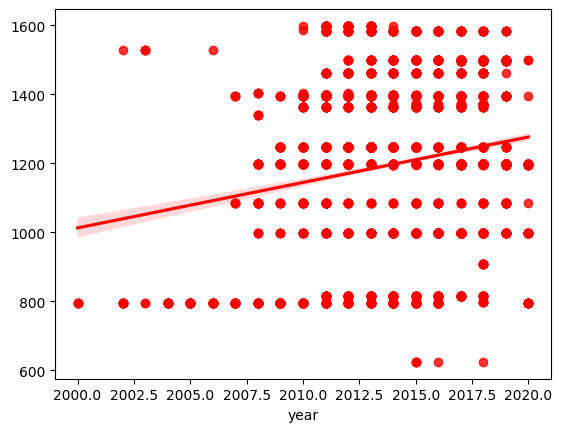

In [ ]:
import seaborn as sns
sns.regplot(x=df["year"],y=y,color="red")

<Axes: xlabel='km_driven'>

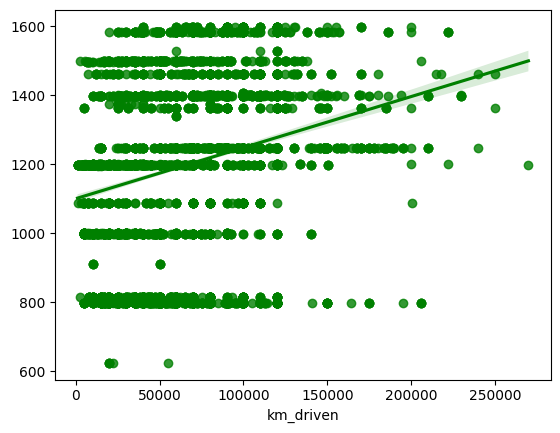

In [ ]:
import seaborn as sns
sns.regplot(x=df["km_driven"],y=y,color="green")

<Axes: xlabel='transmission'>

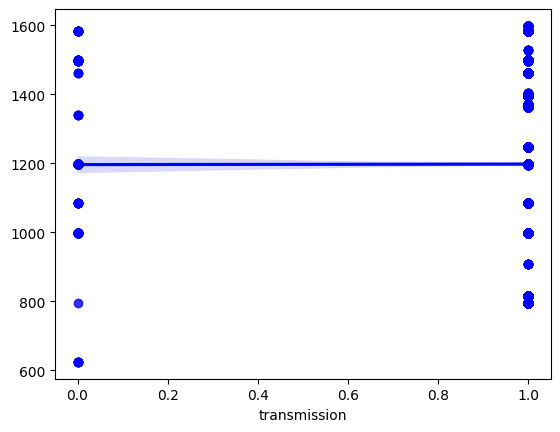

In [ ]:
import seaborn as sns
sns.regplot(x=df["transmission"],y=y,color="blue")

<Axes: xlabel='max_power (in bph)'>

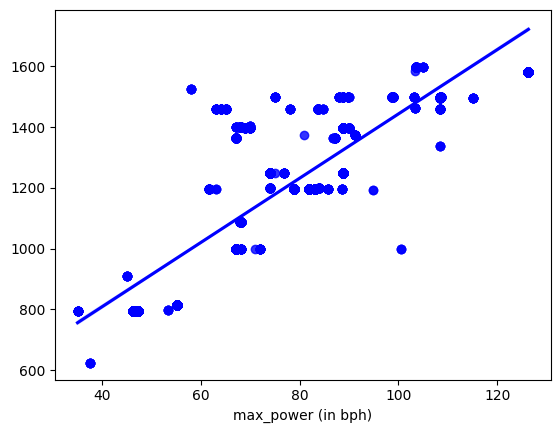

In [ ]:
import seaborn as sns
sns.regplot(x=df["max_power (in bph)"],y=y,color="blue")

<Axes: xlabel='Mileage Unit'>

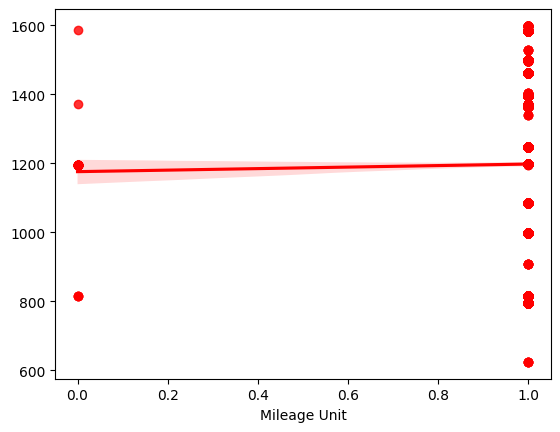

In [ ]:
import seaborn as sns
sns.regplot(x=df["Mileage Unit"],y=y,color="red")

<Axes: xlabel='Engine (CC)'>

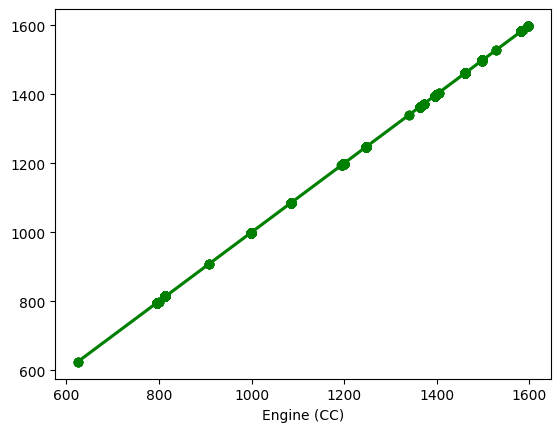

In [ ]:
import seaborn as sns
sns.regplot(x=df["Engine (CC)"],y=y,color="green")

<Axes: xlabel='selling_price'>

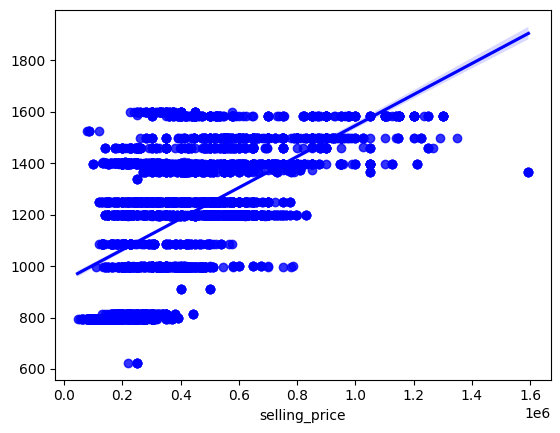

In [ ]:
import seaborn as sns
sns.regplot(x=df["selling_price"],y=y,color="blue")

In [ ]:
# 70% train and 30% test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
x_train

array([[8.643e+03, 2.015e+03, 2.900e+05, ..., 5.520e+01, 1.000e+00,
        2.110e+01],
       [6.444e+03, 2.018e+03, 5.000e+05, ..., 8.186e+01, 1.000e+00,
        2.014e+01],
       [8.718e+03, 2.017e+03, 8.500e+05, ..., 8.873e+01, 1.000e+00,
        2.254e+01],
       ...,
       [8.142e+03, 2.013e+03, 3.550e+05, ..., 7.400e+01, 1.000e+00,
        2.290e+01],
       [7.550e+02, 2.017e+03, 2.800e+05, ..., 7.400e+01, 1.000e+00,
        2.295e+01],
       [9.319e+03, 2.016e+03, 2.800e+05, ..., 5.520e+01, 1.000e+00,
        2.110e+01]])

In [ ]:
#  Initializes and trains a linear regression model.
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([1111.50063785,  840.26245057, 1445.34096363, ...,  915.16519691,
       1277.72419632,  905.37593359])

In [ ]:
print(model.predict([[3,5,3,23,2,3,1,1]]))

[9009.7180354]


In [ ]:
x=df[['year']]
y=df['selling_price']

In [ ]:
y_test_flat = y_test.ravel() #Ensure y_test and y_pred are 1-dimensional for plotting
y_pred_flat = y_pred.ravel()
x_test_year = x_test[:, 0]  #Select the 'year' column from x_test for plotting

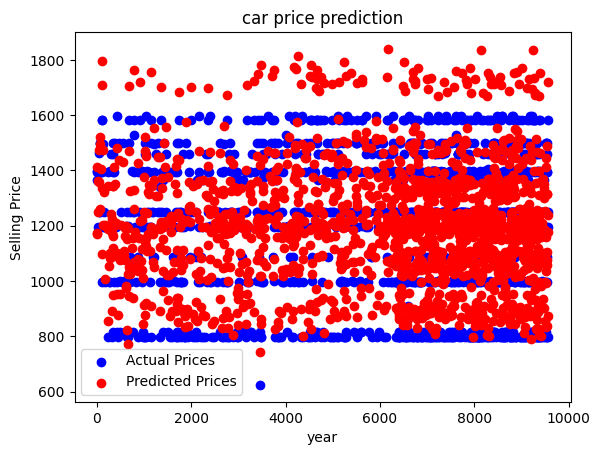

In [ ]:
# Now plot using the selected 'year' column from x_test
plt.scatter(x_test_year, y_test_flat, color='blue', label='Actual Prices')
plt.scatter(x_test_year, y_pred_flat, color='red', label='Predicted Prices')
plt.xlabel("year")
plt.ylabel("Selling Price")
plt.title("car price prediction")
plt.legend()
plt.show()


In [ ]:
# Calculates Mean Absolute Error — average of absolute prediction errors.
from sklearn.metrics import mean_absolute_error
print("mean absolute error",mean_absolute_error(y_test,y_pred))

mean absolute error 87.07712456963486


In [ ]:
# Calculates Mean Absolute Percentage Error — useful for relative error.
from sklearn.metrics import mean_absolute_percentage_error
print("mean absolute percentage error",mean_absolute_percentage_error(y_test,y_pred))

mean absolute percentage error 0.07320551309495003


In [ ]:
# Calculates Mean Squared Error — penalizes large errors more.
from sklearn.metrics import mean_squared_error
print("mean squared error",mean_squared_error(y_test,y_pred))

mean squared error 14670.04380952354


In [ ]:
# Calculates Root Mean Squared Error — interpretable in same units as target.
from sklearn.metrics import root_mean_squared_error
x=mean_squared_error(y_test,y_pred)
print("root mean squared error",np.sqrt(x))

root mean squared error 121.11995628105032


In [ ]:
print("slope is",model.coef_)

slope is [-4.23263743e-04 -4.47165222e+00  1.23744819e-04  9.99581603e-04
  3.20395436e+01  9.67964158e+00 -1.33228787e+02  1.82963373e+01]
